# Channel Selection

Select the best EGG channel from a multi-channel recording using
`select_best_channel`. The best channel is the one with the highest
spectral peak in the normogastric band (2–4 cpm).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gastropy as gp

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [2]:
egg = gp.load_egg()
signal = egg["signal"]  # (7, n_samples)
sfreq = egg["sfreq"]
ch_names = list(egg["ch_names"])
print(f"{signal.shape[0]} channels, {signal.shape[1]} samples")

7 channels, 7580 samples


## Automatic Selection

In [3]:
best_idx, peak_freq, freqs, best_psd = gp.select_best_channel(signal, sfreq)

print(f"Best channel: {ch_names[best_idx]} (index {best_idx})")
print(f"Peak frequency: {peak_freq:.4f} Hz ({peak_freq*60:.2f} cpm)")

Best channel: EGG6 (index 5)
Peak frequency: 0.0530 Hz (3.18 cpm)


## Compare All Channels

Use `select_peak_frequency` on each channel individually to
compare peak frequencies and power.

In [4]:
print(f"{'Channel':<10} {'Peak (Hz)':<12} {'Peak (cpm)':<12} {'Max Power':<12}")
print("-" * 46)
for i in range(signal.shape[0]):
    pf, f, p = gp.select_peak_frequency(signal[i], sfreq)
    marker = " <-- best" if i == best_idx else ""
    if np.isnan(pf):
        print(f"{ch_names[i]:<10} {'no peak':<12} {'---':<12} {'---':<12}")
    else:
        max_pow = p[np.argmin(np.abs(f - pf))]
        print(f"{ch_names[i]:<10} {pf:<12.4f} {pf*60:<12.2f} {max_pow:<12.6f}{marker}")

Channel    Peak (Hz)    Peak (cpm)   Max Power   
----------------------------------------------
EGG1       0.0520       3.12         0.000000    
EGG2       0.0380       2.28         0.000000    
EGG3       0.0520       3.12         0.000000    
EGG4       0.0350       2.10         0.000000    
EGG5       0.0370       2.22         0.000000    
EGG6       0.0530       3.18         0.000000     <-- best
EGG7       0.0530       3.18         0.000000    


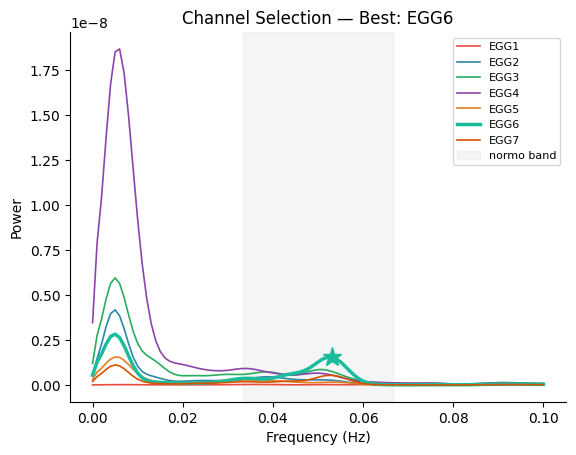

In [5]:
# Visualize with multi-channel PSD
psd_matrix = np.array([gp.psd_welch(signal[i], sfreq, fmin=0.0, fmax=0.1, overlap=0.75)[1]
                       for i in range(signal.shape[0])])

fig, ax = gp.plot_psd(freqs, psd_matrix, ch_names=ch_names,
                       best_idx=best_idx, peak_freq=peak_freq)
ax.set_title(f"Channel Selection — Best: {ch_names[best_idx]}")
plt.show()

**See also:** [PSD Visualization](plot_psd.ipynb),
[PSD Parameters](psd_parameters.ipynb)